In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
data_energia = pd.read_csv('energyco2.csv')

In [3]:
data_energia = data_energia[data_energia['Country'] == 'World']

In [4]:
fuentes = list(data_energia['Energy_type'].unique())

In [5]:
fuentes

['all_energy_types',
 'coal',
 'natural_gas',
 'petroleum_n_other_liquids',
 'nuclear',
 'renewables_n_other']

In [6]:
fuentes[1:4]

['coal', 'natural_gas', 'petroleum_n_other_liquids']

In [7]:
data_energia_no_renovable = data_energia[data_energia['Energy_type'].isin(fuentes[1:4])].iloc[:,[1,3,5]]

In [8]:
data_energia_no_renovable

,Country,Year,Energy_production
1,World,1980,80.114194
2,World,1980,54.761046
3,World,1980,133.111109
1387,World,1981,80.460729
1388,World,1981,55.573537
...,...,...,...
52670,World,2018,144.439144
52671,World,2018,193.050893
54055,World,2019,171.840424
54056,World,2019,149.401588


In [9]:
data_energia_no_renovable = data_energia_no_renovable.groupby('Year').sum()

In [10]:
data_energia_no_renovable.reset_index(inplace= True)

In [11]:
import matplotlib.pyplot as plt

In [12]:
x = data_energia_no_renovable['Year']
y = data_energia_no_renovable['Energy_production']

In [13]:
def tema():
    ax=plt.axes()
    plt.grid(color='#ffffff50', linewidth=0.9)
    ax.set_facecolor('#000000aa'),
    ax.spines['right'].set_visible(False),
    ax.spines['top'].set_visible(False),
    ax.spines['bottom'].set_visible(False),
    ax.spines['left'].set_visible(False),
    

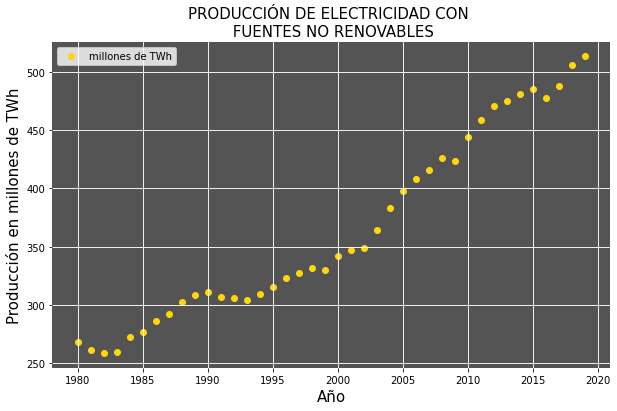

In [14]:
tema()
plt.scatter(x,y,color='#ffd60a')
plt.title('PRODUCCIÓN DE ELECTRICIDAD CON \n FUENTES NO RENOVABLES',fontsize=15)
plt.xlabel('Año',fontsize=15)
plt.ylabel('Producción en millones de TWh',fontsize=15)
plt.gcf().set_size_inches(10, 6)
plt.legend(labels=['millones de TWh'])
plt.show()

In [50]:
def regresionLineal(df):
    '''
    df = DataFrame
    '''
    model = LinearRegression(fit_intercept=True)
    X = np.array(df['Year'])
    y = np.array(df['Energy_production'])
    X = X[:, np.newaxis]
    model.fit(X, y)
    global X_train
    global X_test
    global y_train
    global y_test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=45)
    lr = LinearRegression(fit_intercept = True)
    lr.fit(X_train, y_train)
    
    return lr

In [51]:
data_energia_no_renovable = regresionLineal(data_energia_no_renovable)

In [72]:
print(data_energia_no_renovable.coef_)

[6.93134051]


In [52]:
def grafica(modelo):
    y_train_pred = modelo.predict(X_train)
    y_test_pred = modelo.predict(X_test)
    tema()
    plt.scatter(X_train, y_train,  color='green', linewidth=3.0, label = 'Datos Train')
    plt.plot(X_train, y_train_pred, color='k', linewidth=3.0, linestyle = '--', label = 'Prediccion Train')
    plt.scatter(X_test, y_test,  color='red', label = 'Datos Test')
    plt.plot(X_test, y_test_pred, color='blue', linewidth=3.0, label = 'Prediccion Test')
    plt.gcf().set_size_inches(10, 6)
    plt.legend()
    plt.show()

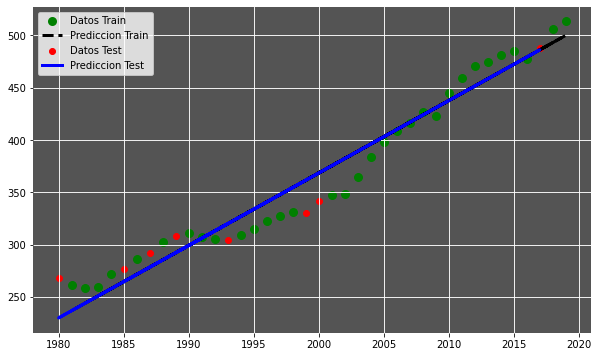

In [53]:
grafica(data_energia_no_renovable)

In [54]:
def prediccion(anio):
    '''
    fecha = 'AAAA'
    '''
    fn = anio # Fecha como número
    fn = np.array(fn)
    fn = fn.reshape(-1,1)
    prediccion = round(float(str(data_energia_no_renovable.predict(fn))[1:-1]),2)
    return prediccion

In [55]:
predicciones_10 = pd.DataFrame()
predicciones_10['Año'] = pd.DataFrame(range(2022,2033))

In [56]:
lista_años = list(predicciones_10['Año'])

In [57]:
predicciones_10['Energia_miles_kWh'] = predicciones_10['Año'].map(prediccion)

In [58]:
x_10 = predicciones_10['Año']
y_10 = predicciones_10['Energia_miles_kWh']

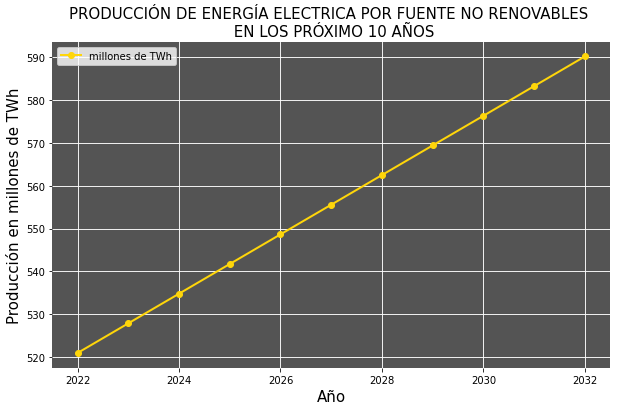

In [59]:
tema()

plt.plot(x_10,y_10,color='#ffd60a', linewidth = 2, marker="o")
plt.title('PRODUCCIÓN DE ENERGÍA ELECTRICA POR FUENTE NO RENOVABLES \n EN LOS PRÓXIMO 10 AÑOS',fontsize=15)
plt.xlabel('Año',fontsize=15)
plt.ylabel('Producción en millones de TWh',fontsize=15)
plt.gcf().set_size_inches(10, 6)
plt.legend(labels=['millones de TWh'])
plt.show()

In [60]:
predicciones_20 = pd.DataFrame()
predicciones_20['Año'] = pd.DataFrame(range(2022,2043))

In [61]:
lista_años = list(predicciones_20['Año'])

In [62]:
predicciones_20['Energia_miles_kWh'] = predicciones_20['Año'].map(prediccion)

In [63]:
x_20 = predicciones_20['Año']
y_20 = predicciones_20['Energia_miles_kWh']

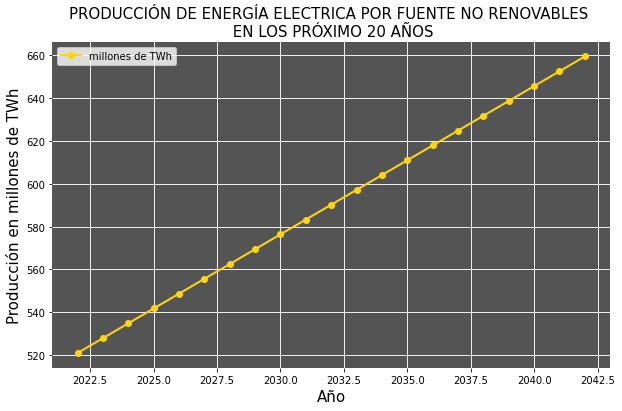

In [64]:
tema()

plt.plot(x_20,y_20,color='#ffd60a', linewidth = 2, marker="o")
plt.title('PRODUCCIÓN DE ENERGÍA ELECTRICA POR FUENTE NO RENOVABLES \n EN LOS PRÓXIMO 20 AÑOS',fontsize=15)
plt.xlabel('Año',fontsize=15)
plt.ylabel('Producción en millones de TWh',fontsize=15)
plt.gcf().set_size_inches(10, 6)
plt.legend(labels=['millones de TWh'])
plt.show()

In [65]:
predicciones_30 = pd.DataFrame()
predicciones_30['Año'] = pd.DataFrame(range(2022,2053))

In [66]:
lista_años = list(predicciones_30['Año'])

In [67]:
predicciones_30['Energia_miles_kWh'] = predicciones_30['Año'].map(prediccion)

In [68]:
x_30 = predicciones_30['Año']
y_30 = predicciones_30['Energia_miles_kWh']

In [73]:
y_30

0     520.90
1     527.83
2     534.76
3     541.70
4     548.63
5     555.56
6     562.49
7     569.42
8     576.35
9     583.28
10    590.22
11    597.15
12    604.08
13    611.01
14    617.94
15    624.87
16    631.80
17    638.73
18    645.67
19    652.60
20    659.53
21    666.46
22    673.39
23    680.32
24    687.25
25    694.19
26    701.12
27    708.05
28    714.98
29    721.91
30    728.84
Name: Energia_miles_kWh, dtype: float64

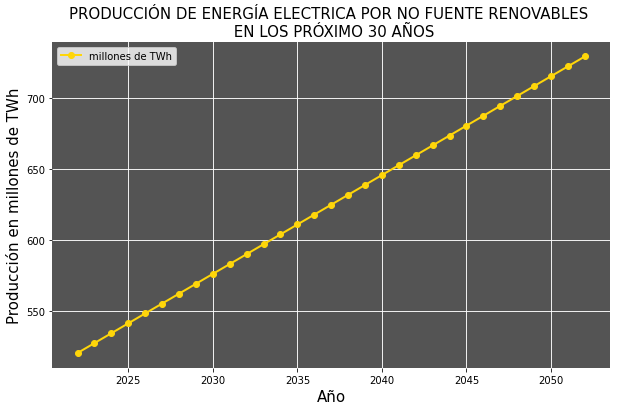

In [69]:
tema()

plt.plot(x_30,y_30,color='#ffd60a', linewidth = 2, marker="o")
plt.title('PRODUCCIÓN DE ENERGÍA ELECTRICA POR NO FUENTE RENOVABLES \n EN LOS PRÓXIMO 30 AÑOS',fontsize=15)
plt.xlabel('Año',fontsize=15)
plt.ylabel('Producción en millones de TWh',fontsize=15)
plt.gcf().set_size_inches(10, 6)
plt.legend(labels=['millones de TWh'])
plt.show()